1. Descriptive analysis + data visualization (exploratory data analysis),
2. Classification along with detailed accuracy assessment,

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
sns.set_palette("pastel")
plt.rcParams["figure.figsize"] = (25, 6)

In [84]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [19]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
print(list(data.columns))
print(data.shape)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
(7043, 21)


<center>


**Table 1: Customer Churn Dataset** 

| Feature          | Description                                           | Type                  |
|------------------|-------------------------------------------------------|-----------------------|
| customerID       | Customer ID, a unique identifier                       | Categorical           |
| gender           | Whether the customer is male or female                 | Categorical           |
| SeniorCitizen    | Whether the customer is a senior citizen (1 or 0)      | Dichotomous categorical |
| Partner          | Whether the customer has a partner (Yes or No)         | Categorical           |
| Dependents       | Whether the customer has dependents (Yes or No)        | Categorical           |
| tenure           | Number of months the customer has stayed               | Integer-valued         |
| PhoneService     | Whether the customer has phone service (Yes or No)      | Categorical           |
| MultipleLines    | Whether the customer has multiple lines                | Categorical           |
| InternetService  | Customer’s internet service provider                   | Categorical           |
| OnlineSecurity   | Whether the customer has online security               | Categorical           |
| OnlineBackup     | Whether the customer has online backup                 | Categorical           |
| DeviceProtection | Whether the customer has device protection             | Categorical           |
| TechSupport      | Whether the customer has tech support                  | Categorical           |
| StreamingTV      | Whether the customer has streaming TV                  | Categorical           |
| StreamingMovies  | Whether the customer has streaming movies              | Categorical           |
| Contract         | The contract term of the customer                      | Categorical           |
| PaperlessBilling | Whether the customer has paperless billing             | Categorical           |
| PaymentMethod    | The customer’s payment method                          | Categorical           |
| MonthlyCharges   | The amount charged to the customer monthly             | Continuous            |
| TotalCharges     | The total amount charged to the customer               | Continuous            |
| Churn            | Whether the customer churned (Yes or No)               | Categorical           |

</center>

In [85]:
data = data.drop(columns="customerID")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [86]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [8]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [87]:
data["TotalCharges"].fillna(0, inplace=True)

In [10]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
data.duplicated().sum()

22

In [12]:
data.drop_duplicates(inplace=True)

In [23]:
no_phone_service_from_multiplelines = data.MultipleLines[
    data.MultipleLines == "No phone service"
].index.to_list()


no_phone_Service = data.PhoneService[data.PhoneService == "No"].index.to_list()


no_phone_Service == no_phone_service_from_multiplelines

True

In [14]:
data.OnlineSecurity[
    data.OnlineSecurity == "No internet service"
].index.to_list() == data.OnlineSecurity[data.InternetService == "No"].index.to_list()

True

In [15]:
data[data.OnlineSecurity == "No internet service"].index.to_list() == data[
    data.OnlineBackup == "No internet service"
].index.to_list() == data[
    data.DeviceProtection == "No internet service"
].index.to_list() == data[
    data.TechSupport == "No internet service"
].index.to_list() == data[
    data.StreamingTV == "No internet service"
].index.to_list() == data[
    data.StreamingMovies == "No internet service"
].index.to_list()

True

In [16]:
columns = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]

indices = [
    data[data[column] == "No internet service"].index.to_list() for column in columns
]

all_equal = all(idx == indices[0] for idx in indices)
all_equal

True

In [17]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# Preliminary analysis of variables

<center>

**Table 2: Feature Distribution in Dataset**

| Feature            | Categories              | Count |
|--------------------|-------------------------|------:|
| Gender             | Male                    |  3555 |
|                    | Female                  |  3488 |
| Senior Citizen     | 0                       |  5901 |
|                    | 1                       |  1142 |
| Partner            | Yes                     |  3402 |
|                    | No                      |  3641 |
| Dependents         | Yes                     |  2110 |
|                    | No                      |  4933 |
| Phone Service      | Yes                     |  6361 |
|                    | No                      |   682 |
| Multiple Lines     | Yes                     |  2971 |
|                    | No                      |  3390 |
|                    | No phone service        |   682 |
| Internet Service   | Fiber optic             |  3096 |
|                    | DSL                     |  2421 |
|                    | No                      |  1526 |
| Online Security    | Yes                     |  2019 |
|                    | No                      |  3498 |
|                    | No internet service     |  1526 |
| Online Backup      | Yes                     |  2429 |
|                    | No                      |  3088 |
|                    | No internet service     |  1526 |
| Device Protection  | Yes                     |  2422 |
|                    | No                      |  3095 |
|                    | No internet service     |  1526 |
| Tech Support       | Yes                     |  2044 |
|                    | No                      |  3473 |
|                    | No internet service     |  1526 |
| Streaming TV       | Yes                     |  2707 |
|                    | No                      |  2810 |
|                    | No internet service     |  1526 |
| Streaming Movies   | Yes                     |  2732 |
|                    | No                      |  2785 |
|                    | No internet service     |  1526 |
| Contract           | Month-to-month          |  3875 |
|                    | Two year                |  1695 |
|                    | One year                |  1473 |
| PaperlessBilling   | Yes                     |  4171 |
|                    | No                      |  2872 |
| Payment Method     | Electronic check        |  2365 |
|                    | Mailed check            |  1612 |
|                    | Bank transfer (automatic)|  1544 |
|                    | Credit card (automatic) |  1522 |
| Churn              | Yes                     |  1869 |
|                    | No                      |  5174 |

</center>


In [24]:
def percentage_stacked_plot(columns_to_plot, super_title):
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    fig = plt.figure(figsize=(28, 15))
    # fig.suptitle(super_title, fontsize=22, y=0.95)

    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(number_of_rows, 2, index)
        prop_by_independent = pd.crosstab(data[column], data["Churn"]).apply(
            lambda x: x / x.sum() * 100, axis=1
        )
        prop_by_independent.plot(kind="bar", ax=ax, stacked=True, rot=0, fontsize=16)
        ax.legend(
            loc="upper right",
            bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
            title="Churn",
            fancybox=True,
        )

        ax.set_title(
            "Proportion of observations by " + column, fontsize=25, loc="center"
        )
        ax.tick_params(rotation="auto")
        plt.tight_layout()

In [25]:
def percentage_stacked_plot2(columns_to_plot, super_title, shape=(2, 2)):
    nrows, ncols = shape
    fig = plt.figure(figsize=(40, 20))
    # fig.suptitle(super_title, fontsize=22, y=0.95)

    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(nrows, ncols, index)
        prop_by_independent = pd.crosstab(data[column], data["Churn"]).apply(
            lambda x: x / x.sum() * 100, axis=1
        )
        prop_by_independent.plot(kind="bar", ax=ax, stacked=True, rot=0, fontsize=16)
        ax.legend(
            loc="upper right",
            bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
            title="Churn",
            fancybox=True,
        )

        ax.set_title(
            "Proportion of observations by " + column, fontsize=25, loc="center"
        )
        ax.tick_params(rotation="auto")
        plt.tight_layout()

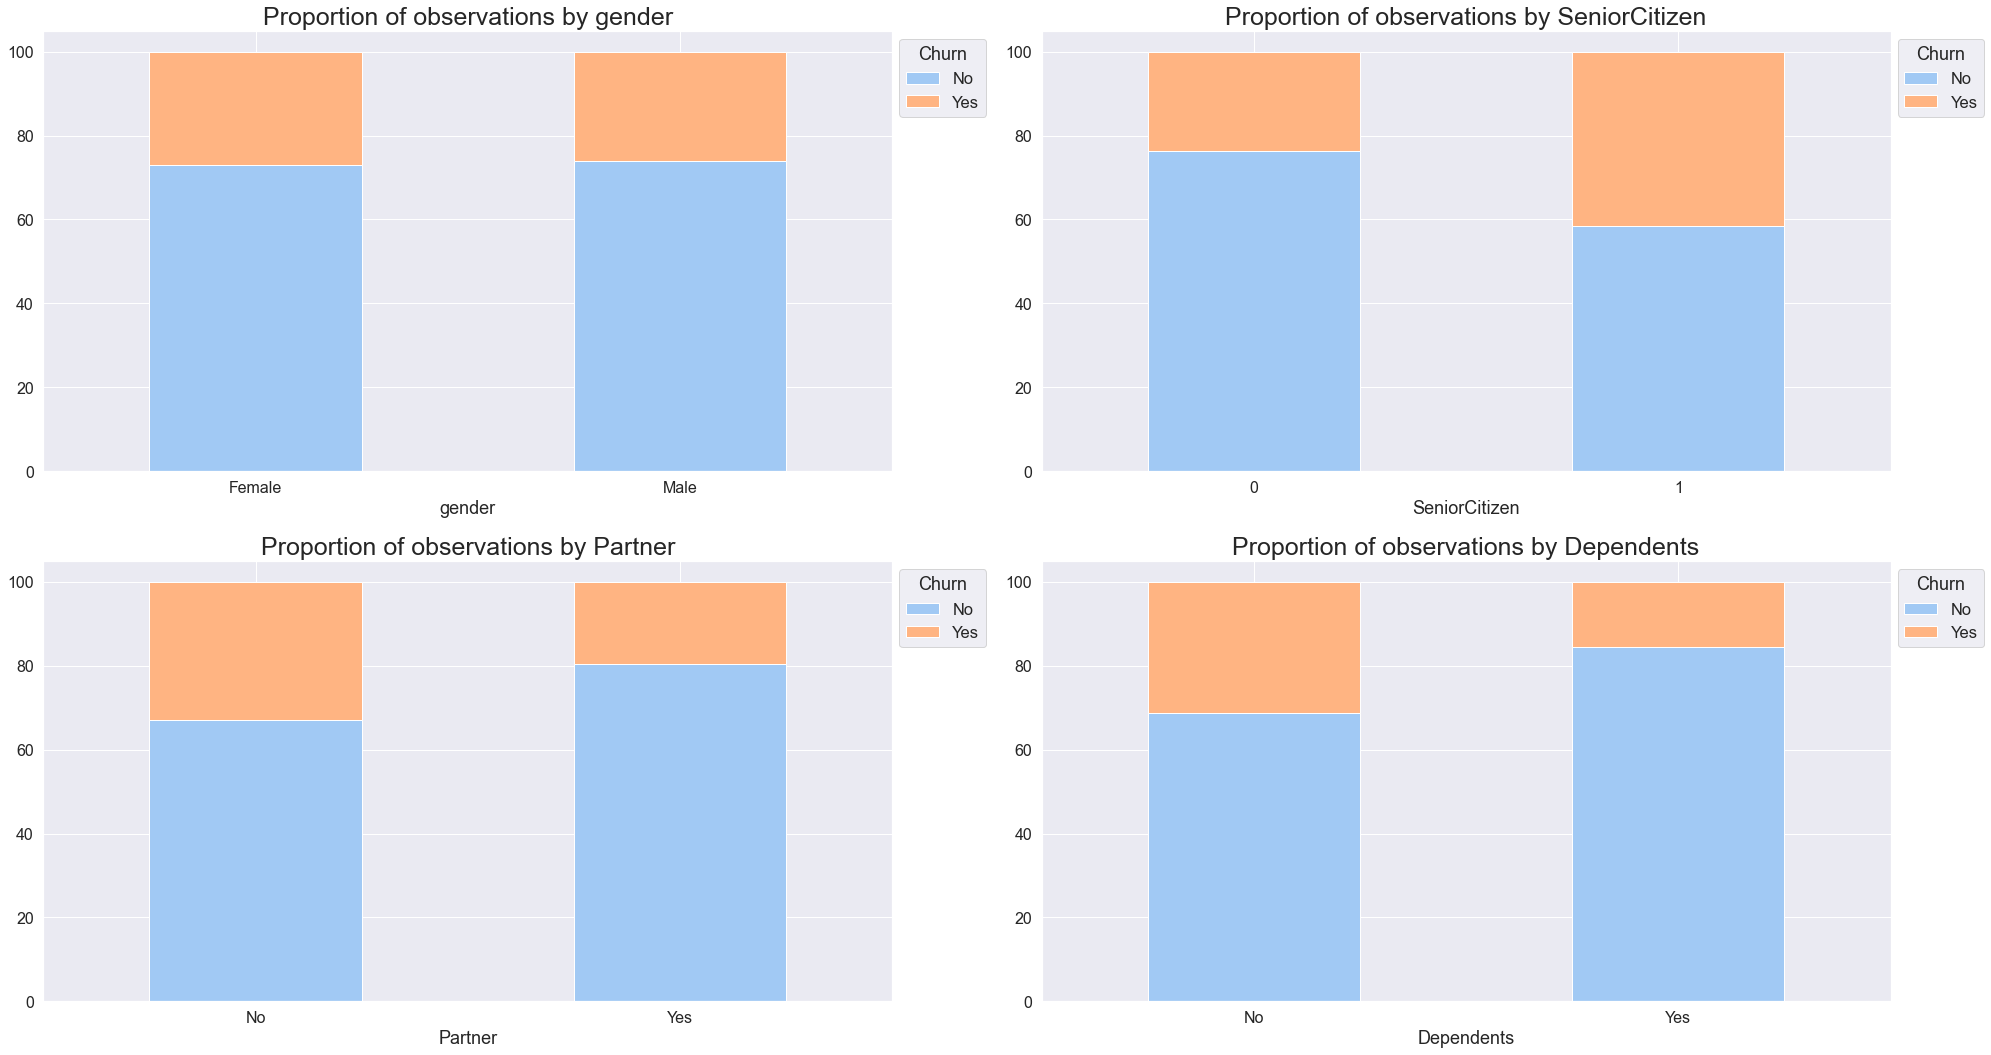

In [26]:
demographic_columns = ["gender", "SeniorCitizen", "Partner", "Dependents"]
percentage_stacked_plot(demographic_columns, "Demographic Information")
plt.savefig("images/demographic_columns.pdf")

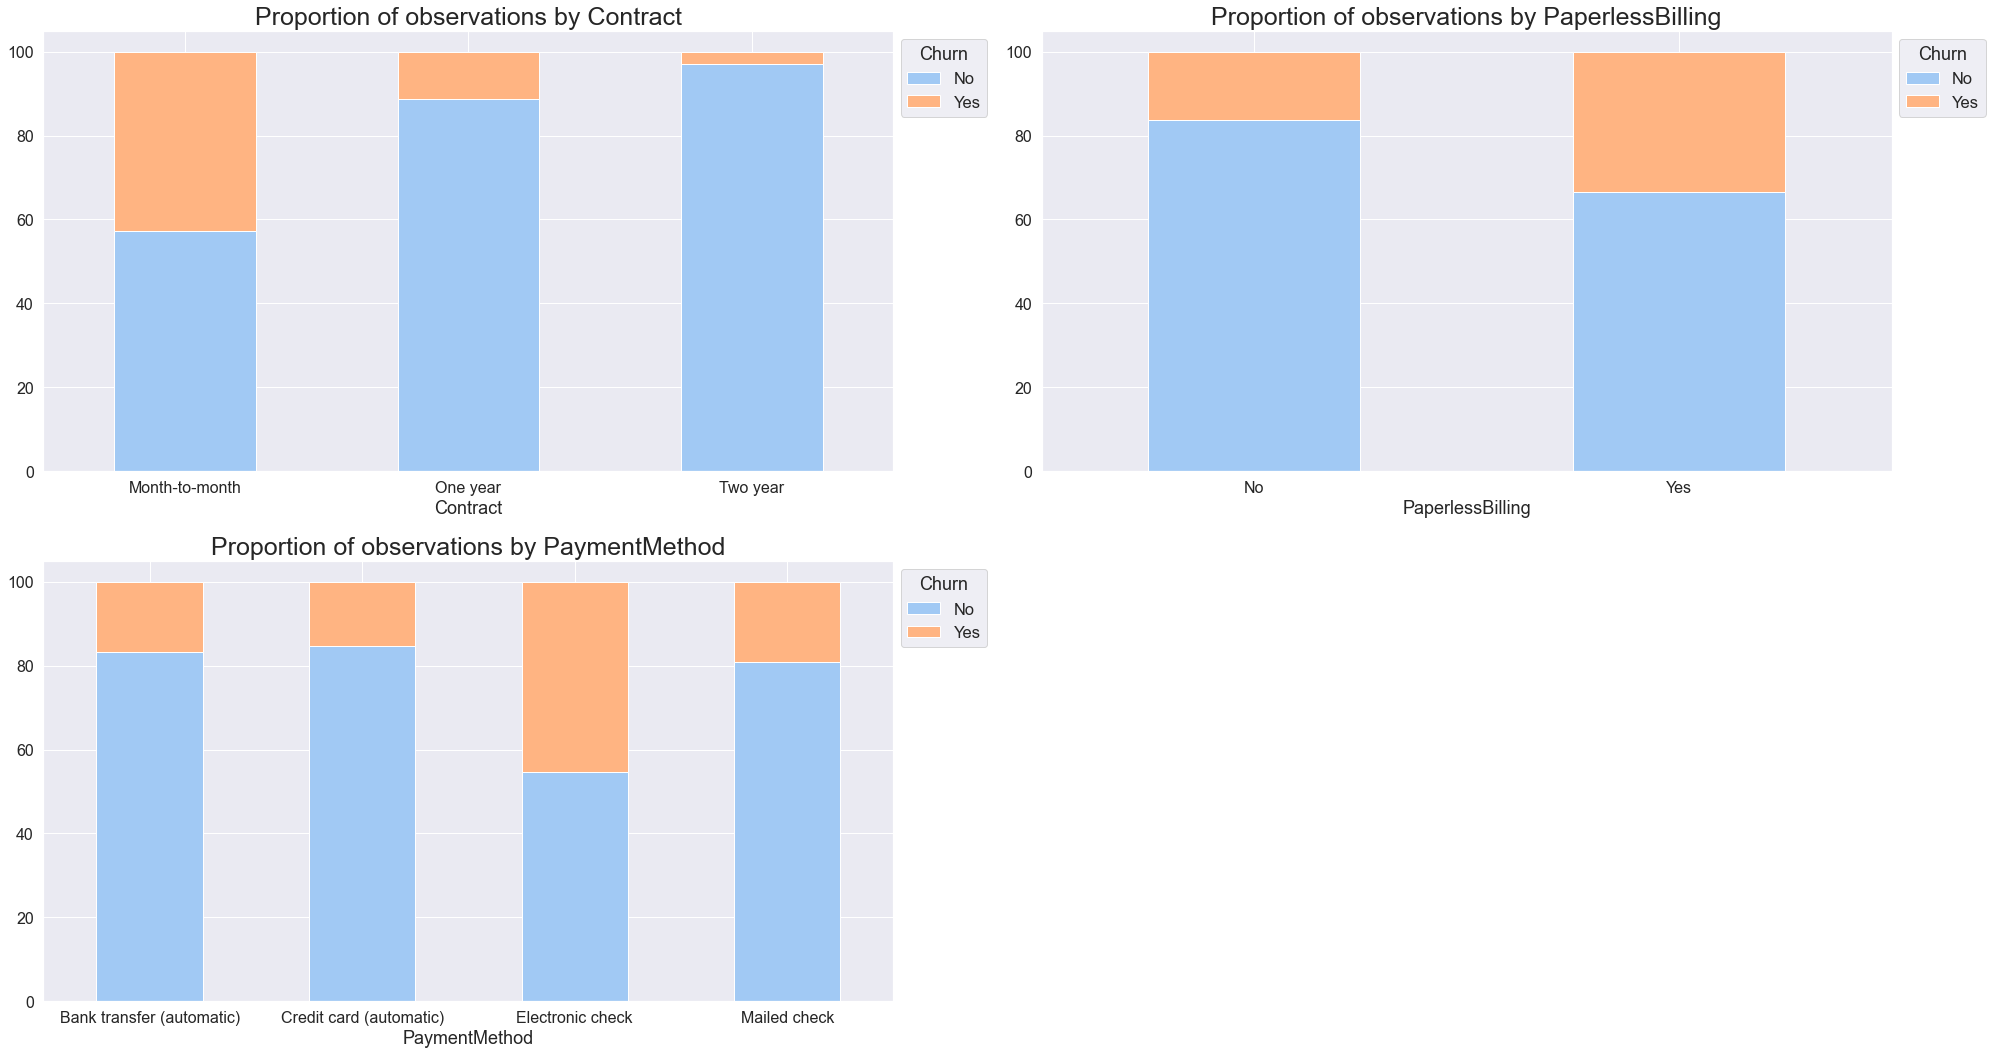

In [27]:
account_columns = ["Contract", "PaperlessBilling", "PaymentMethod"]
percentage_stacked_plot(account_columns, "Customer Account Information")
plt.savefig("images/account_columns.pdf")

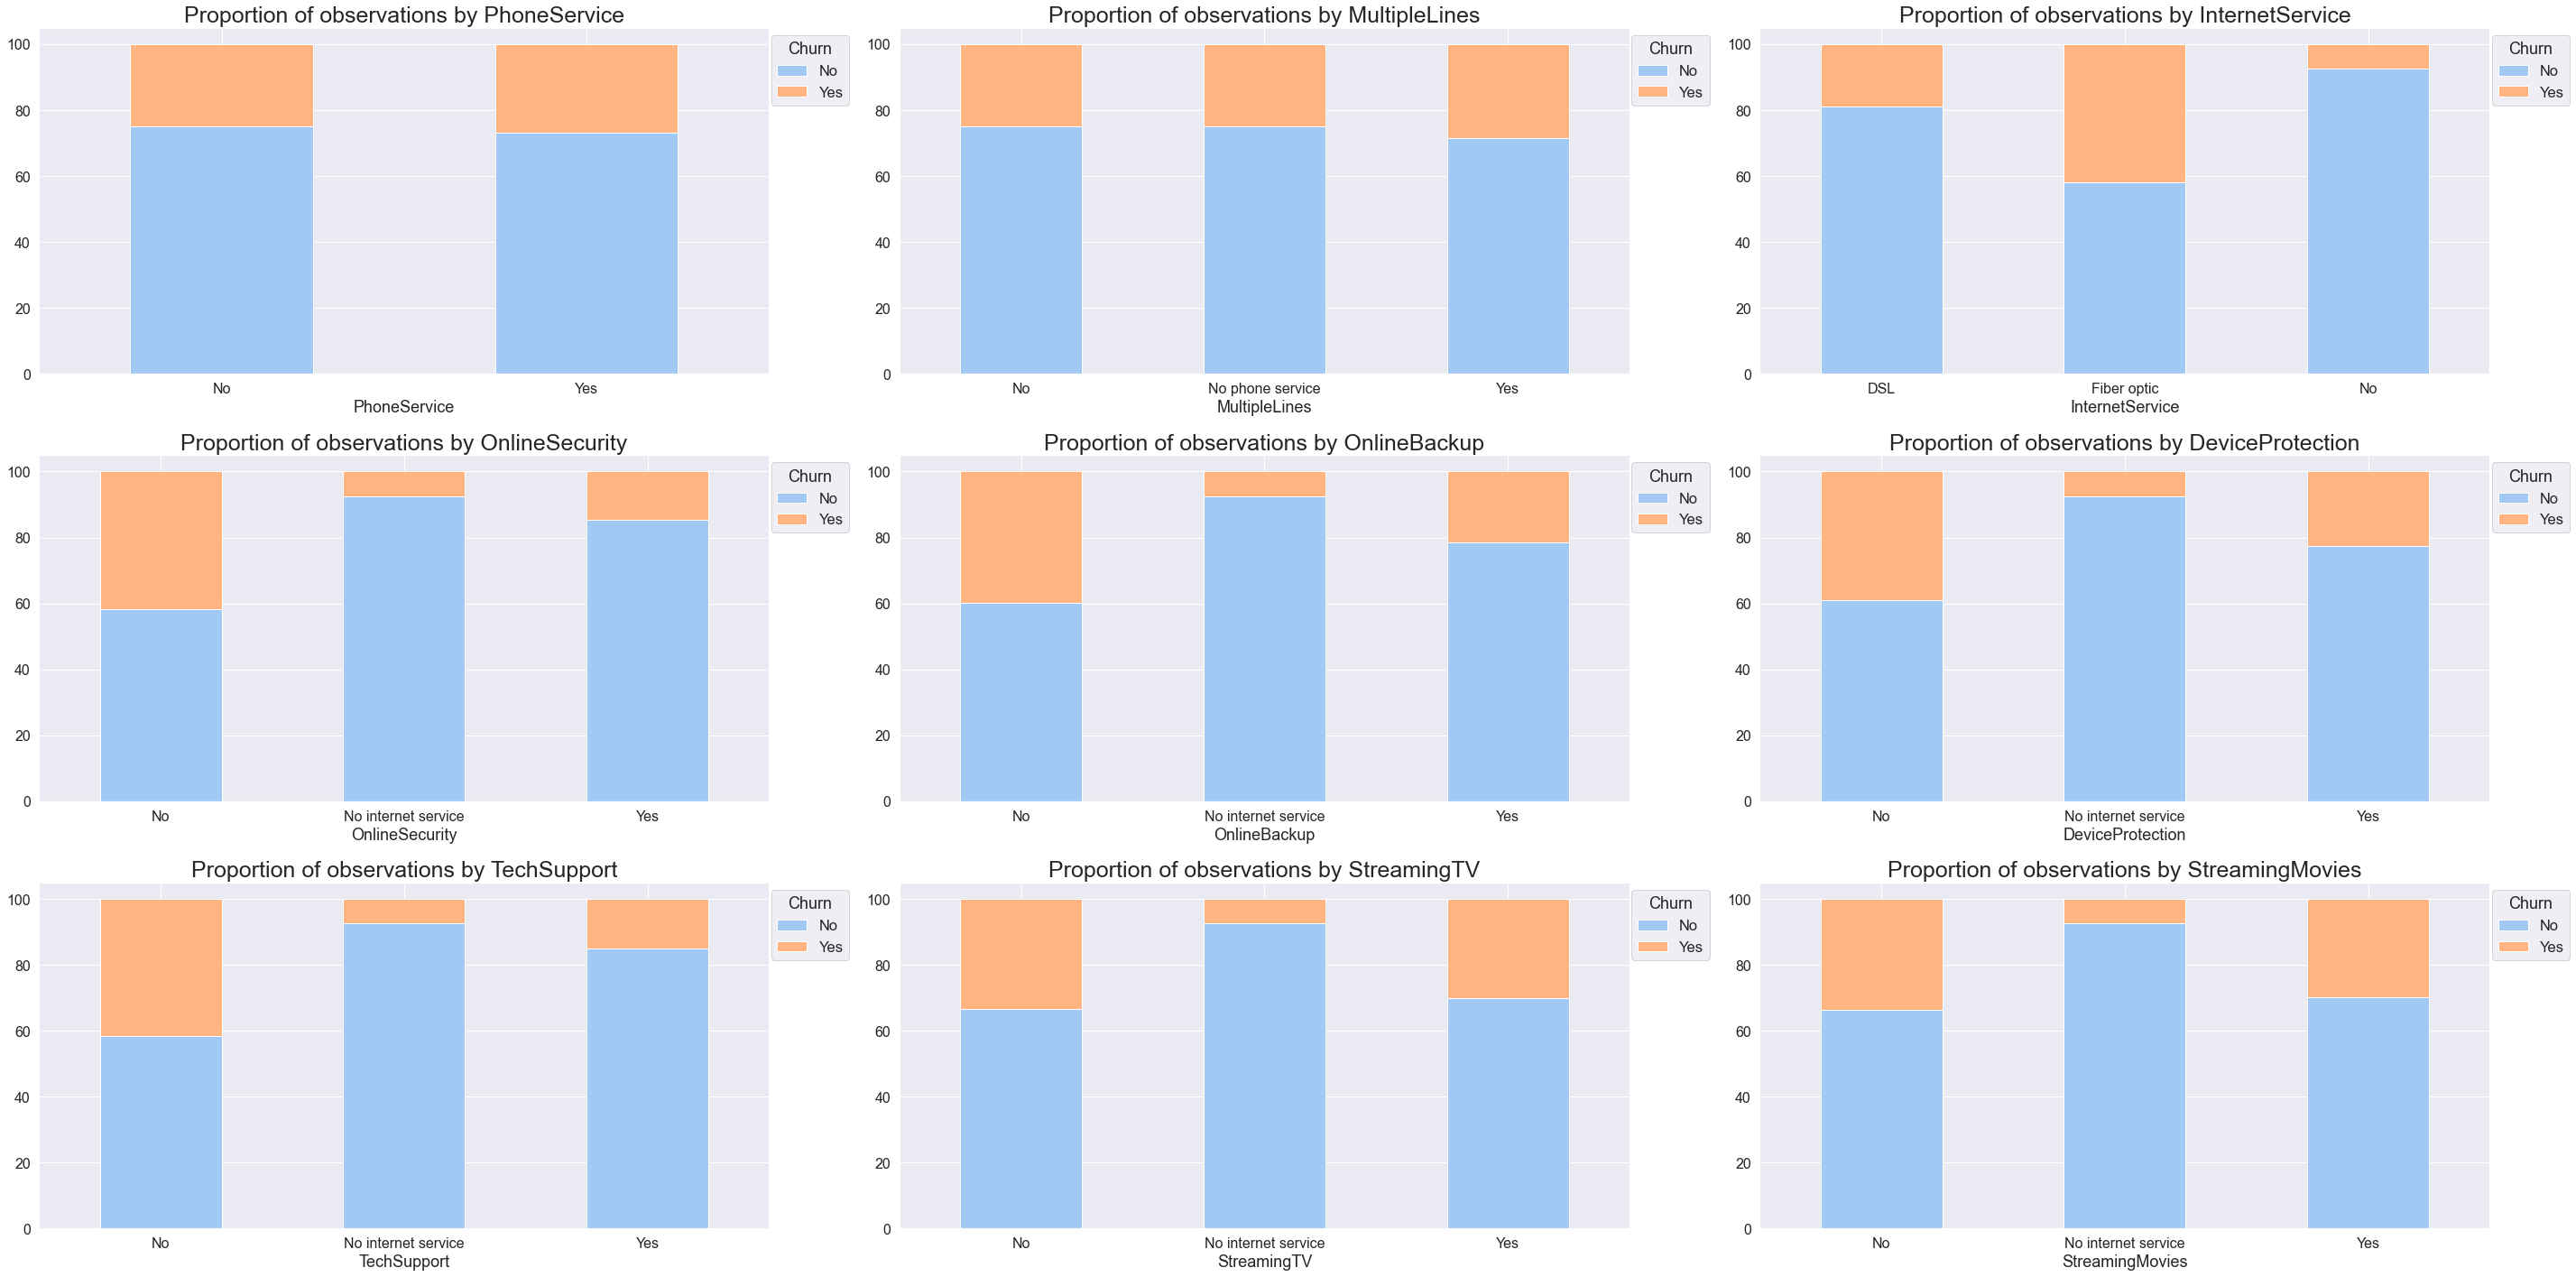

In [28]:
service_columnms = [
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]


percentage_stacked_plot2(service_columnms, "", shape=(3, 3))
plt.savefig("images/service_columns.pdf")

In [29]:
corr_matrix = data.iloc[:, 2:].corr("pearson")

In [30]:
corr_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


In [31]:
product_tenure_monthly = (data["tenure"] * data["MonthlyCharges"]).sum()

total_charges_sum = data["TotalCharges"].sum()

print("Sum of product of tenure and MonthlyCharges:", product_tenure_monthly)
print("Sum of TotalCharges:", total_charges_sum)

correlation = data[["tenure", "MonthlyCharges", "TotalCharges"]].corr()
print("\nCorrelation Matrix:")
print(correlation)

correlation_coefficient = data["tenure"].corr(
    data["TotalCharges"] / data["MonthlyCharges"]
)
print(
    "\nCorrelation Coefficient between tenure and TotalCharges divided by MonthlyCharges:"
)
print(correlation_coefficient)

Sum of product of tenure and MonthlyCharges: 16055091.45
Sum of TotalCharges: 16056168.7

Correlation Matrix:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.826178
MonthlyCharges  0.247900        1.000000      0.651174
TotalCharges    0.826178        0.651174      1.000000

Correlation Coefficient between tenure and TotalCharges divided by MonthlyCharges:
0.9989337042496581


In [35]:
# Calculate the product of 'tenure' and 'MonthlyCharges'
data["Tenure_MonthlyCharges"] = data["tenure"] * data["MonthlyCharges"]

# Calculate correlation between 'TotalCharges' and 'Tenure_MonthlyCharges'
correlation_totalcharges_tenure_monthly = data["TotalCharges"].corr(
    data["Tenure_MonthlyCharges"]
).round(4)

print(
    f"""Correlation between TotalCharges and product of 
    tenure and MonthlyCharges: {correlation_totalcharges_tenure_monthly}"""
)

Correlation between TotalCharges and product of 
    tenure and MonthlyCharges: 0.9996


In [36]:
from scipy.stats import ttest_ind

# Assuming you want to perform a t-test between 'TotalCharges' and 'tenure' * 'MonthlyCharges'
t_stat, p_value = ttest_ind(
    data["TotalCharges"].dropna(), (data["tenure"] * data["MonthlyCharges"]).dropna()
)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 0.004005975924253284
P-Value: 0.9968037589444719


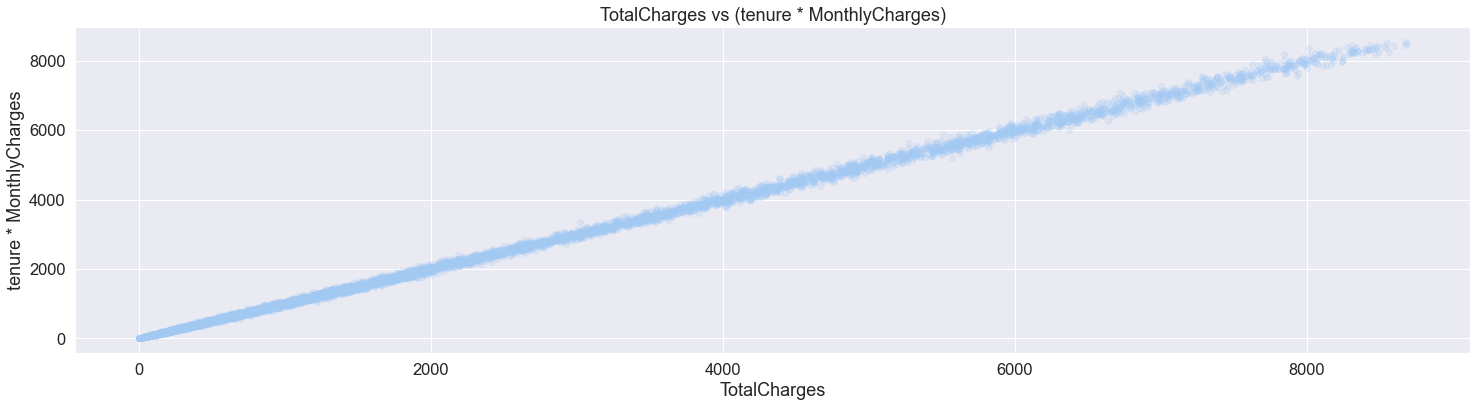

In [37]:
plt.scatter(data["TotalCharges"], data["tenure"] * data["MonthlyCharges"], alpha=0.2)
plt.xlabel("TotalCharges")
plt.ylabel("tenure * MonthlyCharges")
plt.title("TotalCharges vs (tenure * MonthlyCharges)")
plt.savefig("images/correlation_TotalCharges_Monthly_Charges.pdf")

In [38]:
data = data.drop(columns=["TotalCharges"], axis=1)
data["TotalCharges"] = data["tenure"] * data["MonthlyCharges"]

In [39]:
def dist_churn(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 6))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(
            dataset[data][dataset["Churn"] == "No"],
            ax=axs[i],
            fill=True,
            alpha=0.5,
            linewidth=0,
        )
        sns.kdeplot(
            dataset[data][dataset["Churn"] == "Yes"],
            ax=axs[i],
            fill=True,
            alpha=0.6,
            linewidth=0,
        )
        axs[i].legend(
            ["No", "Yes"],
            loc="upper right",
            bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
            title="Churn",
            fancybox=True,
        )
        axs[i].set_title(f"Distribution of {data} by churn")
        axs[i].set_ylabel("Density")
        axs[i].set_xlabel(data)

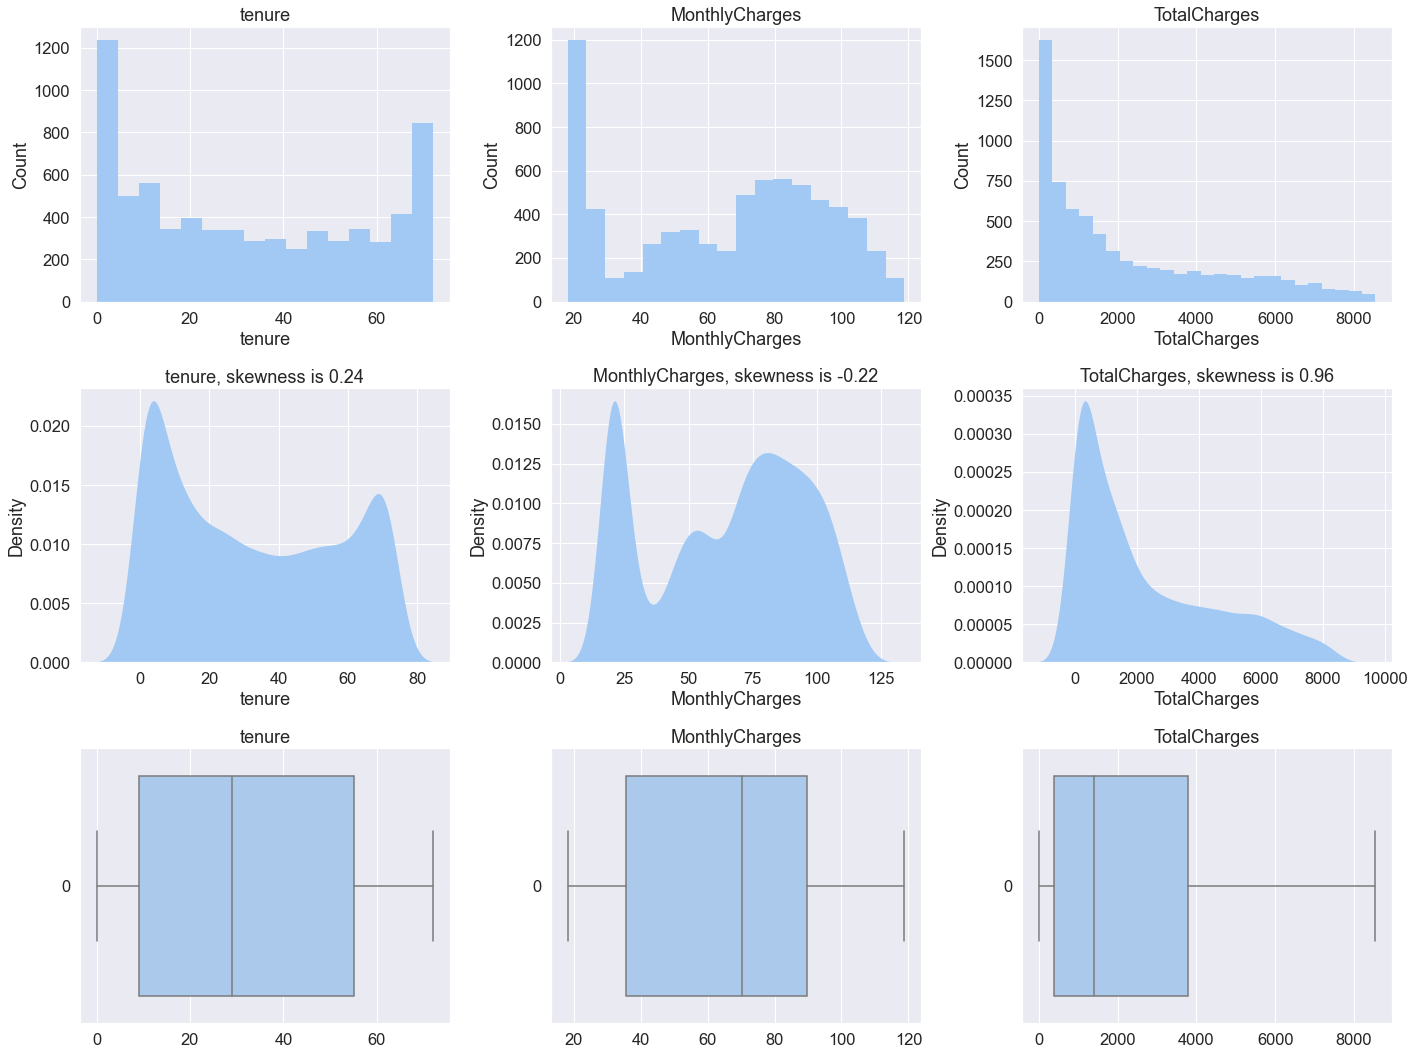

In [40]:
def histograms(dataset, columns_list, rows, cols, suptitle):
    for i, data in enumerate(columns_list):
        sns.histplot(dataset[data], ax=axs[0, i], fill=True, alpha=1, linewidth=0)
        axs[0, i].set_title(data)


def dist_numerical(dataset, columns_list, rows, cols, suptitle):
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[1, i], fill=True, alpha=1, linewidth=0)
        axs[1, i].set_title(
            data
            + ", skewness is "
            + str(round(dataset[data].skew(axis=0, skipna=True), 2))
        )


def boxplots(dataset, columns_list, rows, cols, suptitle):
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient="h", ax=axs[2, i])
        axs[2, i].set_title(data)


fig, axs = plt.subplots(3, 3, figsize=(20, 15))

histograms(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges", "TotalCharges"],
    rows=1,
    cols=3,
    suptitle="Histograms, Distribution Plots, and Boxplots for numerical features",
)

dist_numerical(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges", "TotalCharges"],
    rows=1,
    cols=3,
    suptitle="",
)

boxplots(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges", "TotalCharges"],
    rows=1,
    cols=3,
    suptitle="",
)

plt.tight_layout()
plt.savefig("images/combined_numerical_analysis.pdf")

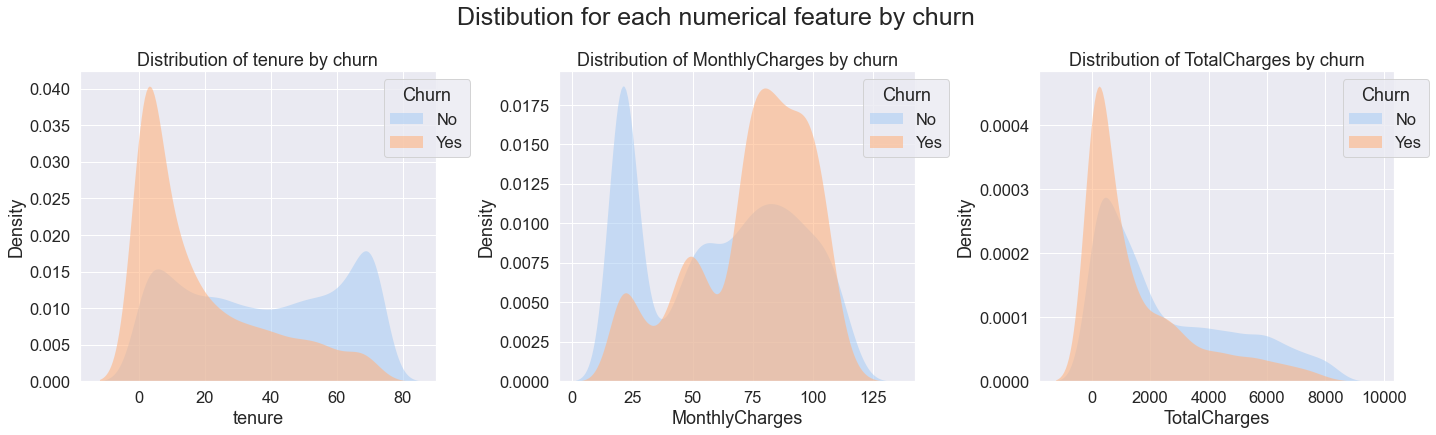

In [32]:
dist_churn(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges", "TotalCharges"],
    rows=1,
    cols=3,
    suptitle="Distibution for each numerical feature by churn",
)
plt.tight_layout()
plt.savefig("images/distributions_churns.pdf")

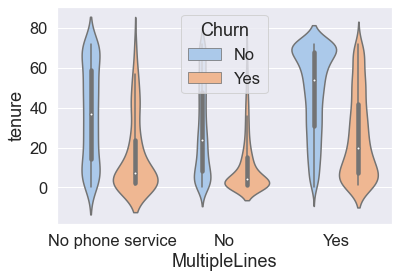

In [33]:
sns.violinplot(data=data, x="MultipleLines", y="tenure", hue="Churn")
plt.show()

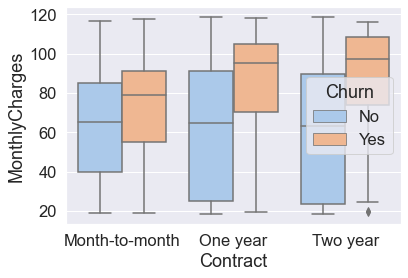

In [34]:
sns.boxplot(data=data, x="Contract", y="MonthlyCharges", hue="Churn")
plt.show()

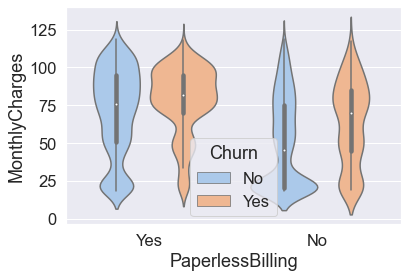

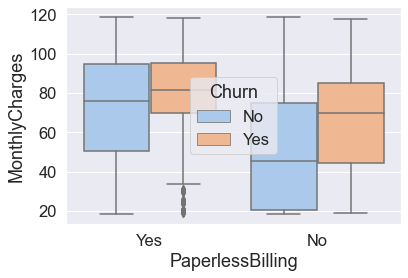

In [35]:
sns.violinplot(data=data, x="PaperlessBilling", y="MonthlyCharges", hue="Churn")
plt.show()
sns.boxplot(data=data, x="PaperlessBilling", y="MonthlyCharges", hue="Churn")
plt.show()

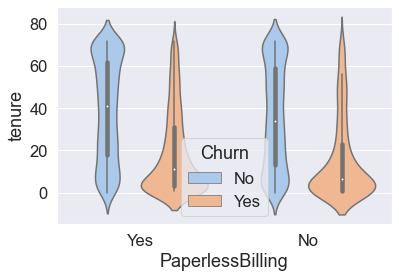

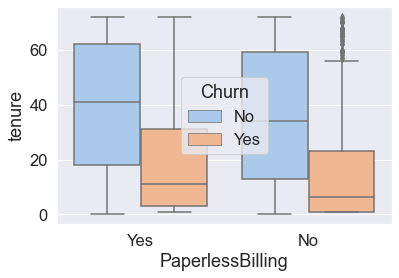

In [36]:
sns.violinplot(data=data, x="PaperlessBilling", y="tenure", hue="Churn")
plt.show()
sns.boxplot(data=data, x="PaperlessBilling", y="tenure", hue="Churn")
plt.show()

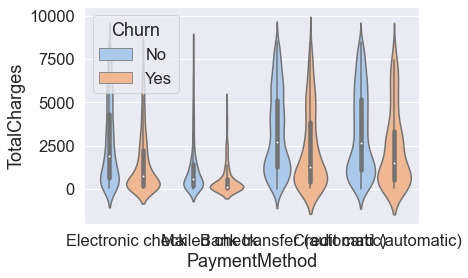

In [37]:
sns.violinplot(data=data, x="PaymentMethod", y="TotalCharges", hue="Churn")
plt.show()
# Wykresy bardzo podobne

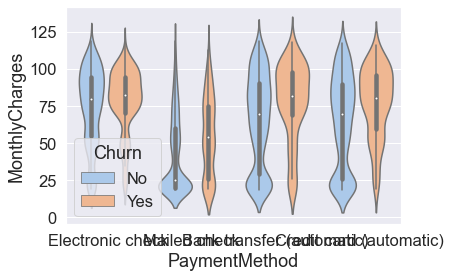

In [38]:
sns.violinplot(data=data, x="PaymentMethod", y="MonthlyCharges", hue="Churn")
plt.show()
# Ciutkę lepiej, ale też zbytnio nic nie daje

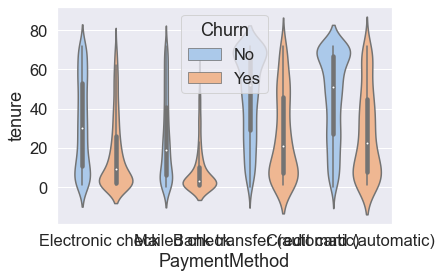

In [39]:
sns.violinplot(data=data, x="PaymentMethod", y="tenure", hue="Churn")
plt.show()
# Tutaj szczególnie dla churn=yes występuje fajna modalność

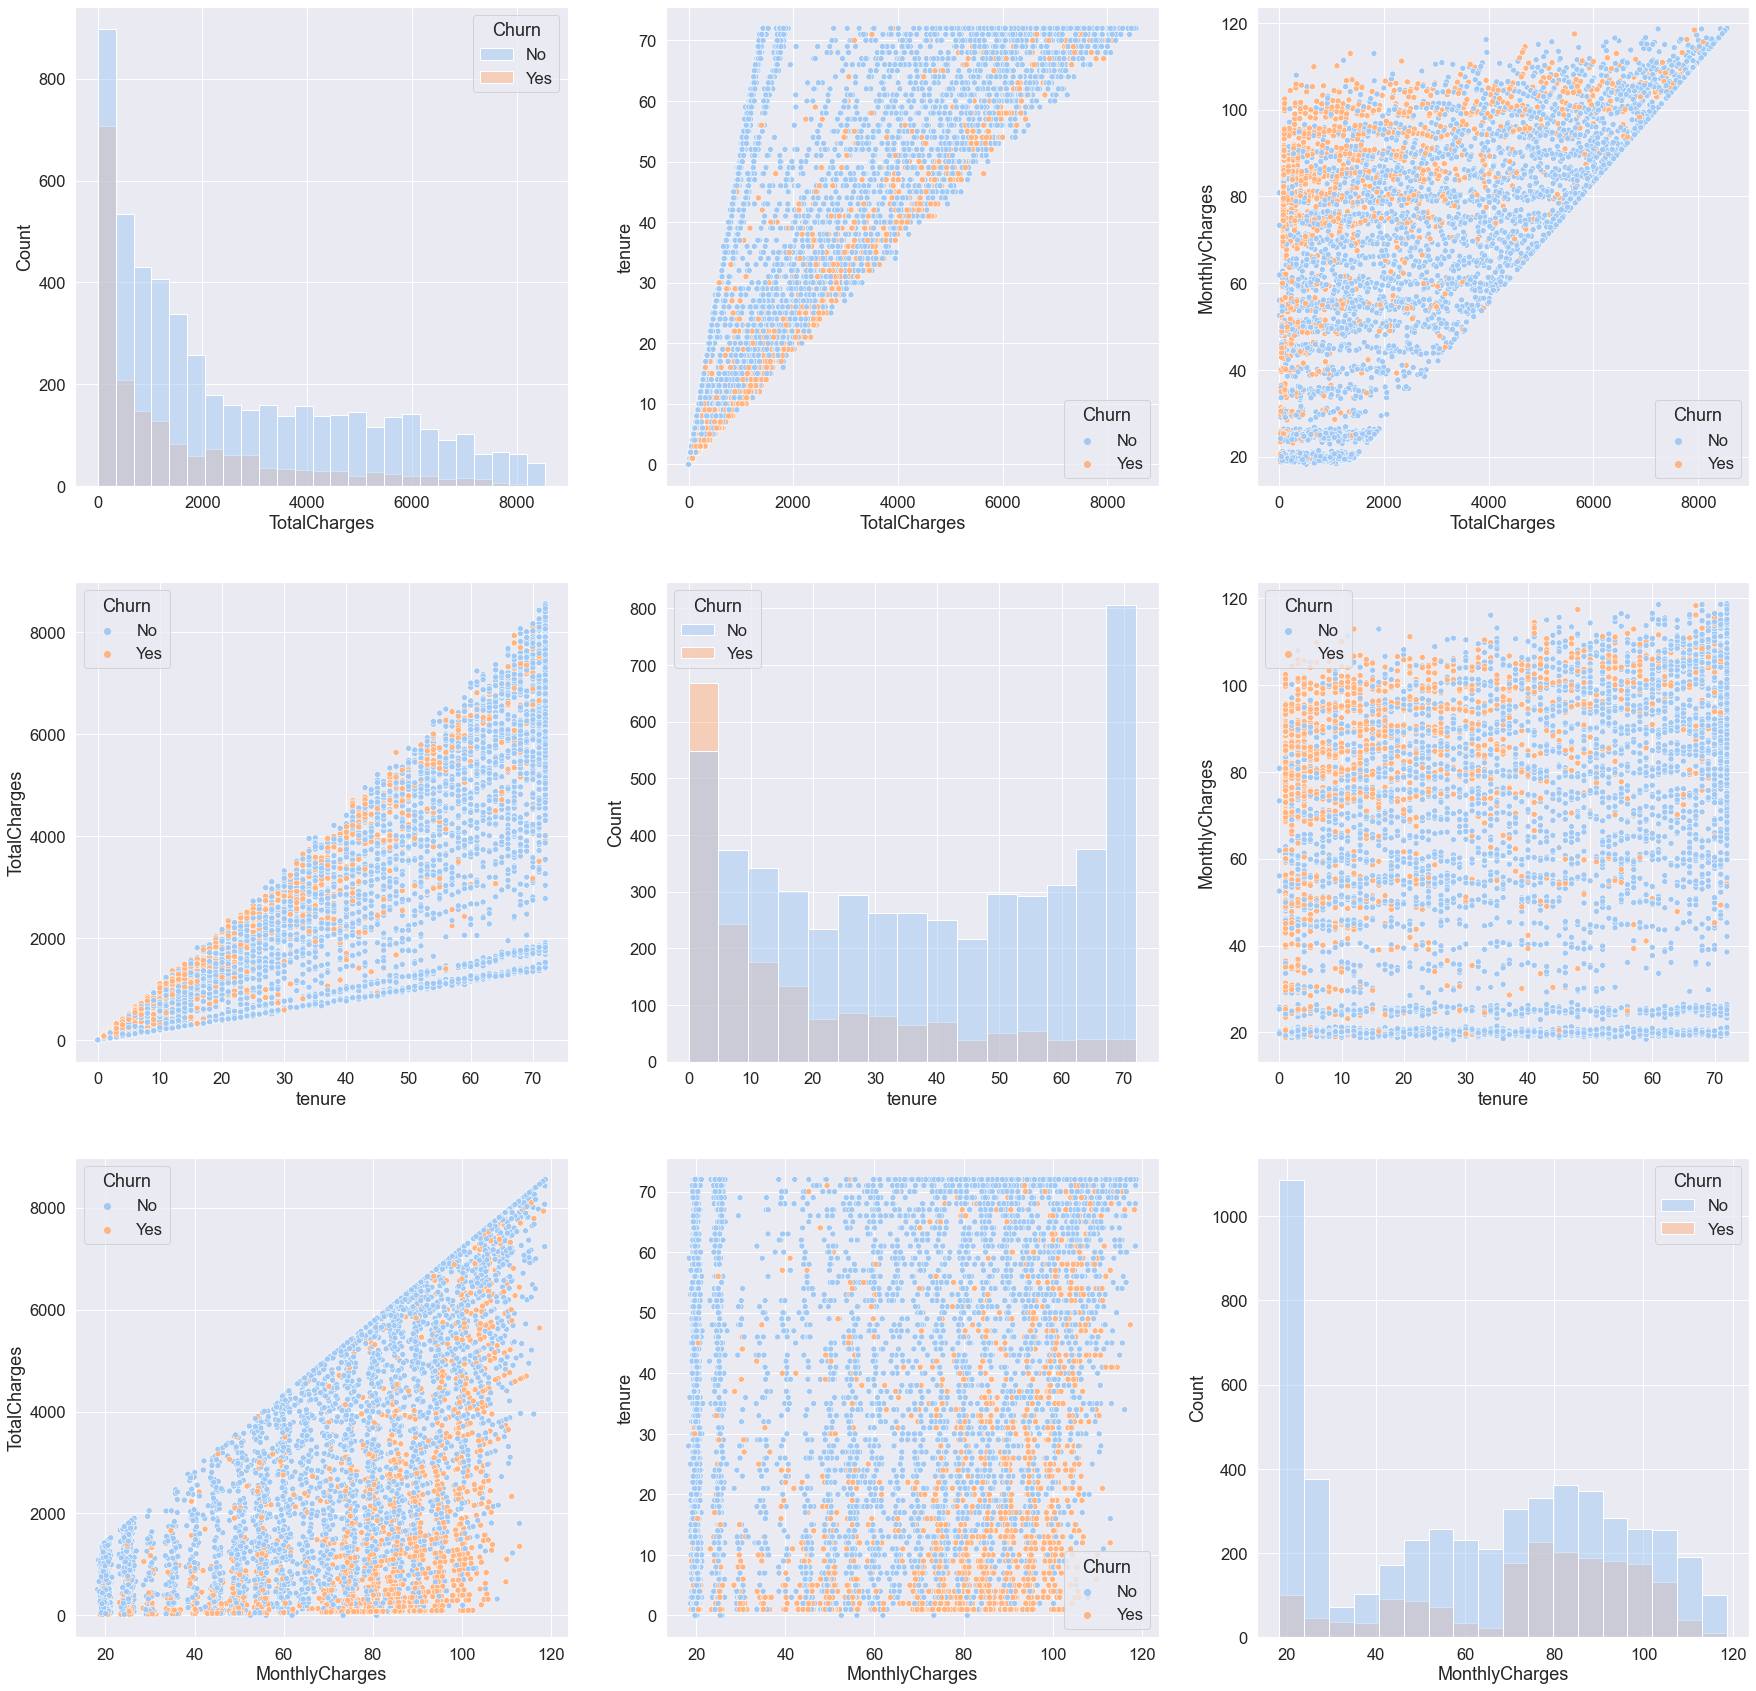

In [40]:
numeric_columns = ["TotalCharges", "tenure", "MonthlyCharges"]
numeric_columns_n = len(numeric_columns)
plt.figure(figsize=(30, 30))
for i, col in enumerate(numeric_columns):
    for j, row in enumerate(numeric_columns):
        plt.subplot(numeric_columns_n, numeric_columns_n, numeric_columns_n * i + j + 1)
        if col == row:
            sns.histplot(data=data, x=col, hue="Churn")
        else:
            sns.scatterplot(data=data, x=col, y=row, hue="Churn")
plt.savefig("images/numeric_features.pdf")

plt.show()

In [75]:
data[["tenure", "MonthlyCharges", "TotalCharges"]].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.0,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.4,89.9,118.75
TotalCharges,7021.0,2286.611594,2264.784091,0.00,400.00,1397.2,3793.4,8550.00


In [81]:
summary_by_churn = (
    data.groupby("Churn")[["tenure", "MonthlyCharges", "TotalCharges"]].describe().T
)
summary_by_churn

Churn                          No          Yes
tenure         count  5164.000000  1857.000000
               mean     37.640782    18.088853
               std      24.083296    19.546231
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5164.000000  1857.000000
               mean     61.344878    74.604308
               std      31.069815    24.597504
               min      18.250000    18.850000
               25%      25.100000    56.500000
               50%      64.500000    79.700000
               75%      88.462500    94.250000
               max     118.750000   118.350000
TotalCharges   count  5164.000000  1857.000000
               mean   2554.669588  1541.188072
               std    2327.987703  1889.082732
               min       0.000000    18.850000
               25%     580.000000   140.700000
               50%    1690.975000   713.650000
               75%    4252.500000  2360.800000
               max    8550.000000  8481.600000

In [47]:
feature_columns = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]

feature_importance = {}

for feature in feature_columns:
    contingency_table = pd.crosstab(data[feature], data["Churn"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    feature_importance[feature] = p
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1])
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Contract: 5.863038300673391e-258
OnlineSecurity: 2.661149635176552e-185
TechSupport: 1.4430840279998987e-180
InternetService: 9.571788222840544e-160
PaymentMethod: 3.6823546520097993e-140
OnlineBackup: 2.0797592160864276e-131
DeviceProtection: 5.505219496457244e-122
StreamingMovies: 2.667756755723681e-82
StreamingTV: 5.528994485739183e-82
PaperlessBilling: 4.073354668665985e-58
Dependents: 4.9249216612154196e-43
SeniorCitizen: 1.510066805092378e-36
Partner: 2.1399113440759935e-36
MultipleLines: 0.0034643829548773
PhoneService: 0.3387825358066928
gender: 0.48657873605618596


In [44]:
from statsmodels.graphics.mosaicplot import mosaic

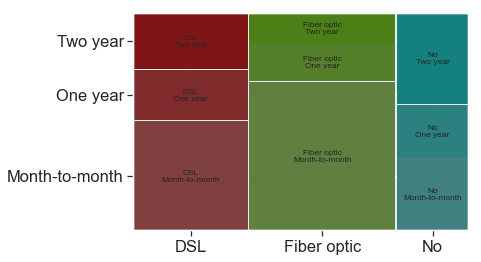

In [46]:
mosaic(data, ["InternetService", "Contract"])
plt.show()

Testy

In [46]:
polytomous_cols = [
    "TechSupport",
    "StreamingMovies",
    "DeviceProtection",
    "MultipleLines",
    "Contract",
    "InternetService",
    "OnlineSecurity",
    "StreamingTV",
    "PaymentMethod",
    "OnlineBackup",
]

In [48]:
def cramers_v(x, y):
    """calculate Cramers V statistic for categorial-categorial association.
    uses correction from Bergsma and Wicher,
    Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [49]:
print("**Correlation Between Polytomous Features with Target : Churn**")
cramer_v_val_dict = {}

for col in polytomous_cols:
    cramer_v_val_dict[col] = cramers_v(data[col], data["Churn"])

cramer_v_val_dict_sorted = sorted(
    cramer_v_val_dict.items(), key=lambda x: x[1], reverse=True
)

for k, v in cramer_v_val_dict_sorted:
    print(f"{k} {v}")

**Correlation Between Polytomous Features with Target : Churn**
Contract 0.40979839182553446
OnlineSecurity 0.34701606688272874
TechSupport 0.3425261587493695
InternetService 0.3220367323307425
PaymentMethod 0.3026771381187204
OnlineBackup 0.291850036724674
DeviceProtection 0.28109492388964397
StreamingMovies 0.23035147282444215
StreamingTV 0.22990176915403474
MultipleLines 0.03639958908232507


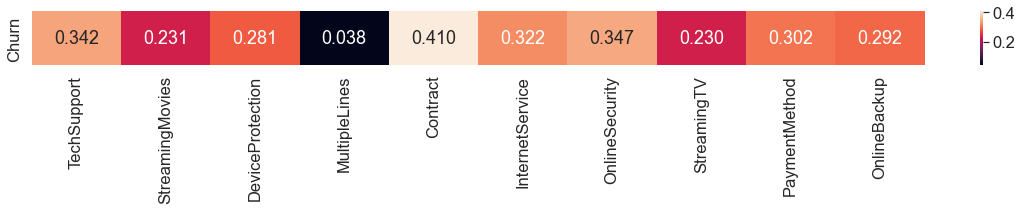

In [94]:
cramers_v_val = pd.DataFrame(index=["Churn"], columns=polytomous_cols)

for j in range(0, len(polytomous_cols)):
    u = cramers_v(data["Churn"], data[polytomous_cols[j]])
    cramers_v_val.loc[:, polytomous_cols[j]] = u

cramers_v_val.fillna(value=np.nan, inplace=True)
plt.figure(figsize=(20, 1))
sns.heatmap(cramers_v_val, annot=True, fmt=".3f")
plt.show()

## Feature selection

In [88]:
# Total charges is exactly tenure multiplied by monthly charges, 
# so we dont need this column.

data = data.drop(columns="TotalCharges")
# We also decided not to use gender, PhoneService and multipleLines
data = data.drop(columns=["PhoneService", 'gender', 'MultipleLines'])



In [89]:
Data = data.copy()
Data.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [96]:
nominal_features = ('PaperlessBilling', 'Dependents', 'Partner', 'Churn')
for feature in nominal_features:
    Data[feature] = Data[feature].map({'Yes': 1, 'No': 0})

In [98]:
one_hot_encoded_data = pd.get_dummies(Data, columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                                       'DeviceProtection', 'TechSupport', 'StreamingTV', 
                                                       'StreamingMovies', 'Contract', 'PaymentMethod']) 

# No internet service column has the same values (we checked it before) for OnlineSecurity, OnlineBackup, DeviceProtection, 
# TechSupport, StreamingTV and StreamingMovies

one_hot_encoded_data.drop(columns = ['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 
                                     'DeviceProtection_No internet service', 'TechSupport_No internet service', 
                                     'StreamingTV_No internet service', 'StreamingMovies_No internet service'], inplace=True)


In [92]:
print(one_hot_encoded_data.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [97]:
Data.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,0
1,0,0,0,34,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,0
2,0,0,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,1
3,0,0,0,45,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,0
4,0,0,0,2,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,1


In [99]:
from sklearn.model_selection import train_test_split
X = one_hot_encoded_data.drop(columns='Churn')
y = one_hot_encoded_data.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
# criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
RandomForest = RandomForestClassifier().fit(X_train, y_train)

# print(RandomForest.score(X_test, y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test, RandomForest.predict(X_test)))



              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.63      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



<AxesSubplot:>

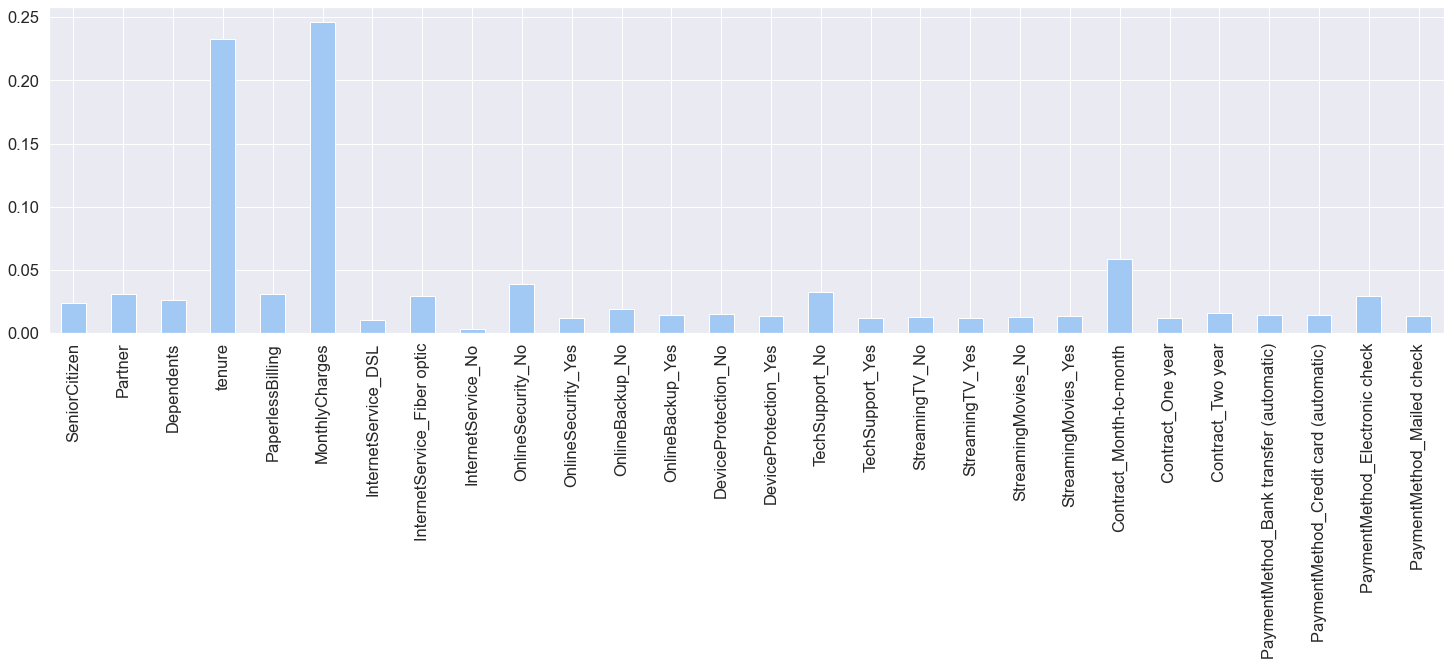

In [107]:
importances = RandomForest.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
forest_importances.plot.bar()

In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Remarks', 'Gender']) 
print(one_hot_encoded_data)